In [1]:
pip install fairlearn

     |████████████████████████████████| 177 kB 7.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=1590, as_frame=True)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
race = data.data['race']
ed = data.data['education']
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [3]:
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=1590, as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
print('# of rows: ', len(df))
df

# of rows:  48842


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [4]:
data

{'data':         age     workclass    fnlwgt     education  education-num  \
 0      25.0       Private  226802.0          11th            7.0   
 1      38.0       Private   89814.0       HS-grad            9.0   
 2      28.0     Local-gov  336951.0    Assoc-acdm           12.0   
 3      44.0       Private  160323.0  Some-college           10.0   
 4      18.0           NaN  103497.0  Some-college           10.0   
 ...     ...           ...       ...           ...            ...   
 48837  27.0       Private  257302.0    Assoc-acdm           12.0   
 48838  40.0       Private  154374.0       HS-grad            9.0   
 48839  58.0       Private  151910.0       HS-grad            9.0   
 48840  22.0       Private  201490.0       HS-grad            9.0   
 48841  52.0  Self-emp-inc  287927.0       HS-grad            9.0   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      

In [10]:
import fairlearn.metrics as fm
from sklearn import metrics as skm
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)

y_pred = classifier.predict(X)
gm = fm.MetricFrame(metrics=skm.accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)

print("Overall accuracy: %f" % gm.overall)
print("By group accuracy: ")
print(gm.by_group)

Overall accuracy: 0.844355
By group accuracy: 
sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: object


In [11]:
sr = fm.MetricFrame(metrics=fm.selection_rate, y_true=y_true, y_pred=y_pred, 
                 sensitive_features=sex, control_features=ed)

Found 32 subgroups. Evaluation may be slow


In [17]:
sr.difference()

education
10th            0.003050
11th            0.016039
12th            0.013198
1st-4th         0.005376
5th-6th         0.010451
7th-8th         0.005598
9th             0.004783
Assoc-acdm      0.031977
Assoc-voc       0.021560
Bachelors       0.466774
Doctorate       0.553107
HS-grad         0.014670
Masters         0.497604
Preschool       0.033898
Prof-school     0.471121
Some-college    0.030595
Name: selection_rate, dtype: float64

In [39]:
sr.by_group

education     sex   
10th          Female    0.00875274
              Male       0.0118026
11th          Female    0.00461538
              Male        0.020654
12th          Female    0.00473934
              Male       0.0179372
1st-4th       Female             0
              Male      0.00537634
5th-6th       Female    0.00787402
              Male       0.0183246
7th-8th       Female     0.0083682
              Male       0.0139665
9th           Female    0.00454545
              Male      0.00932836
Assoc-acdm    Female     0.0255183
              Male       0.0574949
Assoc-voc     Female     0.0326975
              Male       0.0542577
Bachelors     Female      0.214372
              Male        0.681146
Doctorate     Female      0.274336
              Male        0.827443
HS-grad       Female     0.0166765
              Male       0.0313465
Masters       Female      0.265089
              Male        0.762693
Preschool     Female             0
              Male       0.0338983

In [46]:
sr = MetricFrame(metrics=fm.accuracy_score_ratio, y_true=y_true, y_pred=y_pred, 
                 sensitive_features=sex)
sr.overall

TypeError: __call__() missing 1 required keyword-only argument: 'sensitive_features'

In [ ]:
fm.

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90ff3e87b8>,
      dtype=object)

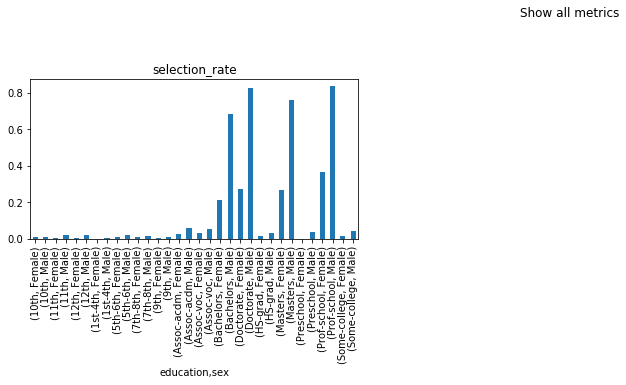

In [44]:
sr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[20, 10],
    title="Show all metrics",
)

In [17]:
metrics = {
    'accuracy': skm.accuracy_score,
    'precision': skm.precision_score,
    'recall': skm.recall_score,
    'false positive rate': fm.false_positive_rate,
    'true positive rate': fm.true_positive_rate,
    'selection rate': fm.selection_rate,
    'count': fm.count}


In [40]:
metric_frame = MetricFrame(metrics=metrics,
                           y_true=y_true,
                           y_pred=y_pred,
                           sensitive_features=sex,
                           control_features=ed)

Found 32 subgroups. Evaluation may be slow
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90ff3e0eb8>,
      dtype=object)

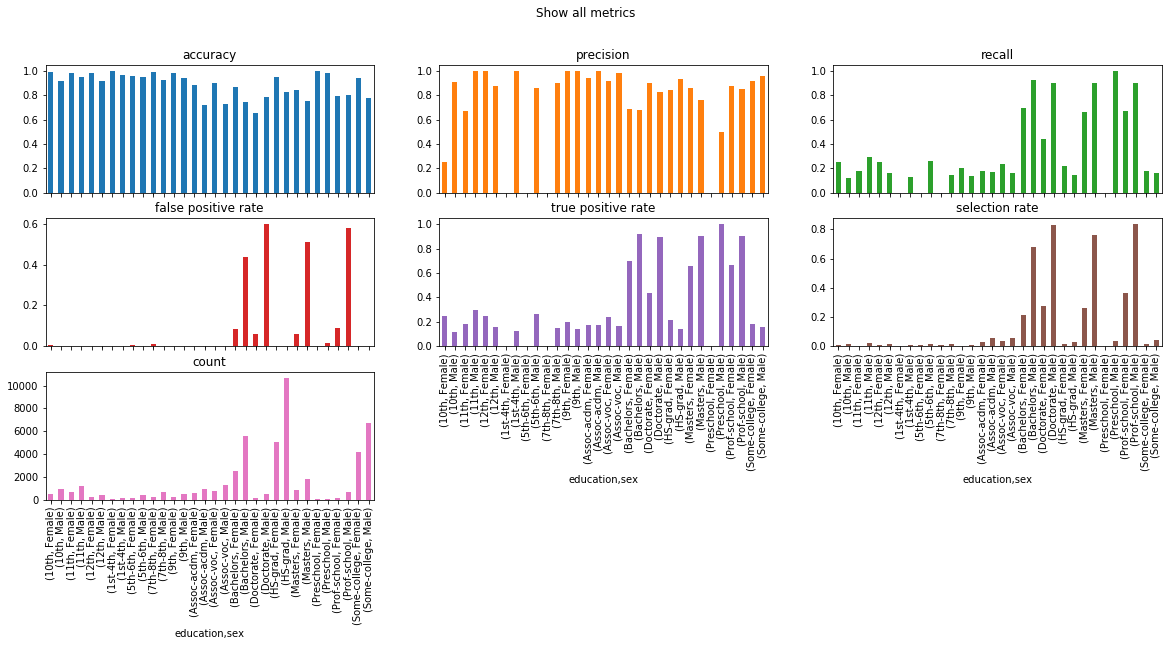

In [45]:
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[20, 8],
    title="Show all metrics",
)